In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
#print(check_output(["pip" , "install" ,"requests"]).decode("utf8"))



# Load data
df = pd.DataFrame()

#This is the standar csv, with the gravatar images for each repo     
df = pd.read_csv('C:\Users\Supeshala\PycharmProjects\GithubUserClustering\TopStaredRepositories.csv')
df.set_index(['Repository Name'])

df.head(2)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,JavaScript,290k,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24T15:40:21Z,JavaScript,112k,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap


In [2]:
## Cleaning data
# We fill the emptpy URL cells
df['Url'] = "http://github.com/" +         df['Username'] + "/" + df['Repository Name']
# We add a final comma character for the tag string, it will be usefull when we tokenize
df['Tags'].fillna("", inplace=True)
df['Tags'] = df['Tags'] + ","

# We do not want uppercase on any label
df['Language'] = df.loc[:, 'Language'].str.lower()
# Copy a backup variable, so we can change our main dataframe
df_backup = df.copy(deep=True)
df.head(2)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,javascript,290k,"nonprofits,certification,curriculum,react,node...",http://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24T15:40:21Z,javascript,112k,"javascript,css,html,bootstrap,jekyll-site,scss,",http://github.com/twbs/bootstrap


In [3]:
# Generate tag list
mergedlist = []
for i in df['Tags'].dropna().str.split(","):
    mergedlist.extend(i)
tags = sorted(set(mergedlist))
# Encode languages in single column
just_dummies = pd.get_dummies(df['Language'])
for column in just_dummies.columns:
    if column not in df.columns:
        df[column] = just_dummies[column]
df.head(2)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,assembly,batchfile,...,rascal,ruby,rust,scala,shell,swift,tex,typescript,vim script,vue
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,javascript,290k,"nonprofits,certification,curriculum,react,node...",http://github.com/freeCodeCamp/freeCodeCamp,0,0,...,0,0,0,0,0,0,0,0,0,0
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24T15:40:21Z,javascript,112k,"javascript,css,html,bootstrap,jekyll-site,scss,",http://github.com/twbs/bootstrap,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
for tag in tags:
    if tag not in df.columns:
        df[tag] = 0
    try:
        if len(tag) > 4 :
            df.loc[df['Repository Name'].str.contains(tag), tag] = 1
            df.loc[df['Description'].str.contains(tag), tag] = 1
        df.loc[df['Tags'].str.contains(tag + ","), tag] = 1
    except Exception:
        pass
# Remove columns not needed
df.set_index(['Repository Name'])
COLUMNS_TO_REMOVE_LIST = ['', 'Username', 'Repository Name', 'Description',
                          'Last Update Date', 'Language', 'Number of Stars', 'Tags', 'Url','Gravatar' ,'Unnamed: 0']
# Stop words: links to (https://github)
RAGE_TAGS_LIST = [ 'github','algorithms','learn','learning','http' ,'https']

for column in COLUMNS_TO_REMOVE_LIST + RAGE_TAGS_LIST:
    try:
        del df[column]
    except Exception:
        pass

df.columns = df.columns.str.lower()


print ("Our final label matrix for repo list is")
df.head(10)  


Our final label matrix for repo list is


,assembly,batchfile,c,c#,c++,clojure,coffeescript,crystal,css,elixir,...,yii,yii2,youtube,zephir,zero-configuration,zeromq,zookeeper,zsh,zsh-configuration,zxing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output

# Load the csv 
df = pd.DataFrame()
df = pd.read_csv('C:\Users\Supeshala\PycharmProjects\GithubUserClustering\user-languages.csv')

# Remove names, to have only float values
try: 
    del(df['user_id'])
except Exception:
    print ("Error", Exception)
    
# Small sample
df.iloc[:5,3:8]

,c#,c++,clojure,coffeescript,css
0,0.0000,0.00000,0.000000,0.0,0.000000
1,0.0171,0.00000,0.000000,0.0,0.000000
2,0.0000,0.00000,0.000000,0.0,0.000000
3,0.0000,0.00000,0.252336,0.0,0.000000
4,0.0000,0.10231,0.000000,0.0,0.005776


In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

N_DEVELOPERS = 17000
df_reduced = df.tail(N_DEVELOPERS)

scores = []
for n_clusters in range(3,13):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 0).fit(df_reduced)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_reduced, labels)
    print("For developers =", N_DEVELOPERS ," and n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    scores.append(silhouette_avg)
    
scores

('For developers =', 17000, ' and n_clusters =', 3, 'The average silhouette_score is :', 0.11414573480712764)
('For developers =', 17000, ' and n_clusters =', 4, 'The average silhouette_score is :', 0.130235327950821)
('For developers =', 17000, ' and n_clusters =', 5, 'The average silhouette_score is :', 0.1380708748417007)
('For developers =', 17000, ' and n_clusters =', 6, 'The average silhouette_score is :', 0.14444646540339964)
('For developers =', 17000, ' and n_clusters =', 7, 'The average silhouette_score is :', 0.10572328418561959)
('For developers =', 17000, ' and n_clusters =', 8, 'The average silhouette_score is :', 0.1499842911897415)
('For developers =', 17000, ' and n_clusters =', 9, 'The average silhouette_score is :', 0.11669811473753838)
('For developers =', 17000, ' and n_clusters =', 10, 'The average silhouette_score is :', 0.12019922654029727)
('For developers =', 17000, ' and n_clusters =', 11, 'The average silhouette_score is :', 0.12311895287171538)
('For develo

[0.11414573480712764,
 0.130235327950821,
 0.1380708748417007,
 0.14444646540339964,
 0.10572328418561959,
 0.1499842911897415,
 0.11669811473753838,
 0.12019922654029727,
 0.12311895287171538,
 0.08333082495931045]

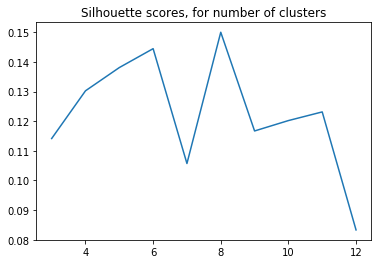

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
score = [0.11414573480812767,
 0.13023532795215215,
 0.13807087484342054,
 0.14444646540548431,
 0.10572328418828708,
 0.1499842911925803,
 0.11669811474070241,
 0.12019922654379787,
 0.1231189528756723,
 0.083330824963460268]
all_scores = [None,None,None] + scores
plt.plot((all_scores))
plt.title('Silhouette scores, for number of clusters')

plt.show()

In [9]:
import operator
import pandas as pd
from sklearn.cluster import KMeans

n_clusters = 8
kmeans = KMeans(n_clusters = n_clusters, random_state = 0).fit(df)
labels = kmeans.labels_#
#   
roles = pd.DataFrame()# Glue back to originaal data
#
df['clusters'] = labels
label_df = []
for cluster in range(n_clusters):
    sub_df = df[df['clusters'] == cluster]
    dict_tags = {}
    for column in sub_df.columns:
        if sub_df[column].sum() > 0: dict_tags[column] = sub_df[column].sum()#
    dict_tags.pop('clusters', None)
    sorted_dict_tags = sorted(dict_tags.items(), key = operator.itemgetter(1))
    my_type = pd.DataFrame.from_dict(sorted_dict_tags).tail(10)
    my_type.columns = ['Skill' , 'Weight' ]
    print("Type: ", cluster , " " ,sub_df.shape[0]/df.shape[0]*100 ," % of users" )#
    print(my_type)
    new_role_element = pd.DataFrame.from_dict(sorted_dict_tags).tail(10).T.iloc[0: 2]
    new_role_element.columns = pd.DataFrame.from_dict(sorted_dict_tags).tail(10).T.iloc[0]
    total =  float(sub_df.shape[0])
    new_role_element  = new_role_element.iloc[1: 2] / total
    roles = pd.concat((new_role_element, roles))
    
roles.fillna(0, inplace=True)

('Type: ', 0, ' ', 0, ' % of users')
          Skill      Weight
814        html   10.309532
815       shell   12.288928
816     library   12.692214
817         css   13.658834
818   framework   13.724775
819   wordpress   15.656482
820      simple   16.767843
821     laravel   17.145426
822  javascript   48.470819
823         php  177.195450
('Type: ', 1, ' ', 0, ' % of users')
          Skill     Weight
247     angular   1.466733
248      google   1.524337
249       build   1.740751
250        ruby   2.301311
251      simple   2.383679
252     website   2.974862
253       theme   3.568978
254  javascript   8.037469
255        html  52.729948
256         css  55.594205


c:\python27\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



('Type: ', 2, ' ', 0, ' % of users')
          Skill      Weight
903   framework   17.497450
904         css   18.681031
905        html   18.835961
906     library   23.068065
907       files   24.096917
908       shell   25.928898
909      simple   30.999944
910       rails   70.087772
911  javascript   85.752403
912        ruby  382.321965
('Type: ', 3, ' ', 0, ' % of users')
          Skill      Weight
835        html   13.714895
836     example   13.867262
837      kotlin   14.554947
838      simple   16.659241
839      python   16.802153
840      google   17.366880
841  javascript   30.950143
842     library   31.352717
843     android  158.767554
844        java  313.243258
('Type: ', 4, ' ', 0, ' % of users')
          Skill      Weight
930           c   20.403500
931         c++   21.301816
932       files   21.849977
933     library   24.864481
934        html   25.193654
935      simple   25.211851
936       shell   26.387056
937      django   42.871558
938  javascript   67.

('Developer type : ', 'Apple Developer')


,Skill,Weight
5,objective-c,39.577581
9,swift,31.395423
3,javascript,5.483610
8,simple,4.353706
7,ruby,3.934589
1,framework,3.787039
4,library,3.755914
2,image,2.718423
0,cocoa,2.659492
6,phone,2.334222


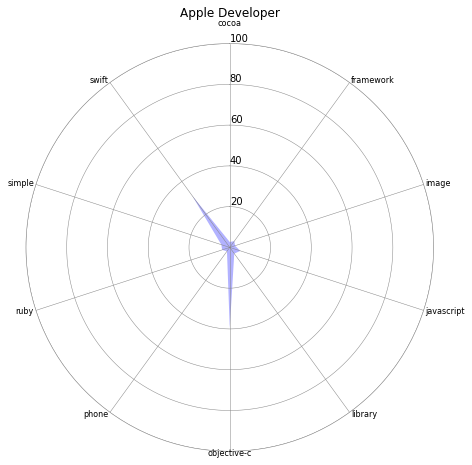

('Developer type : ', 'Multi language Jedi Developer')


,Skill,Weight
5,javascript,24.576126
7,python,12.401331
2,go,10.533924
9,shell,9.815278
1,c++,7.805839
8,ruby,7.411165
0,c,7.190678
4,java,7.012947
3,html,6.719079
6,library,6.533633


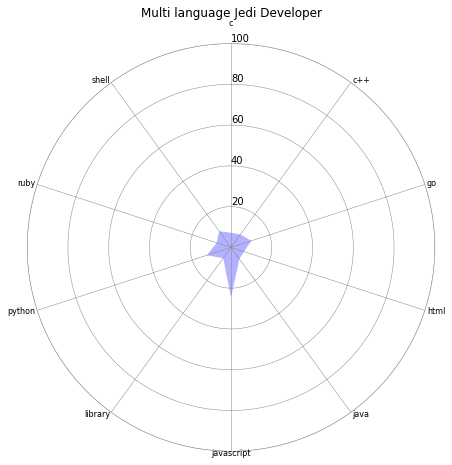

('Developer type : ', 'React Angular')


,Skill,Weight
4,javascript,67.699331
7,react,5.301265
1,css,4.763922
3,html,4.740257
9,simple,3.864223
5,library,3.228062
0,angular,2.703707
2,files,2.663833
8,ruby,2.529956
6,python,2.505442


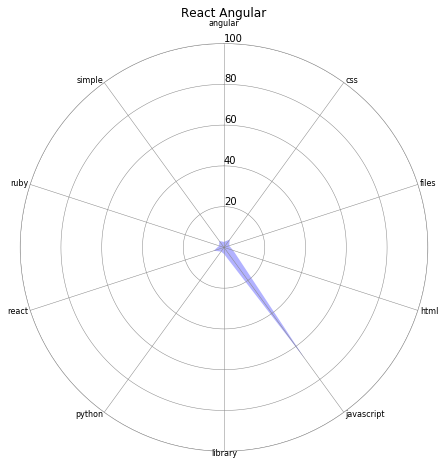

('Developer type : ', 'Python with django ')


,Skill,Weight
7,python,61.837805
5,javascript,9.317610
2,django,5.942855
8,shell,3.657773
9,simple,3.494866
4,html,3.492344
6,library,3.446714
3,files,3.028843
1,c++,2.952857
0,c,2.828333


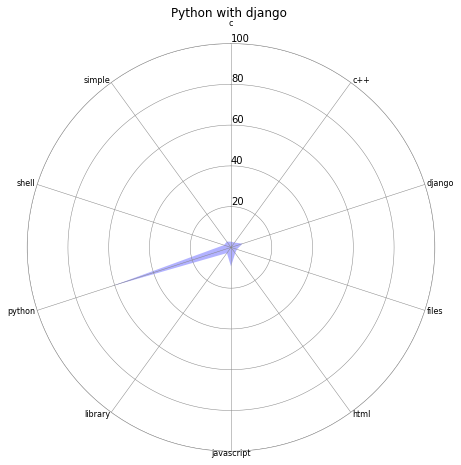

('Developer type : ', 'Android with Java')


,Skill,Weight
4,java,49.936828
0,android,25.310514
7,library,4.998209
5,javascript,4.934031
2,google,2.768605
8,python,2.678577
9,simple,2.655794
6,kotlin,2.320331
1,example,2.210701
3,html,2.186410


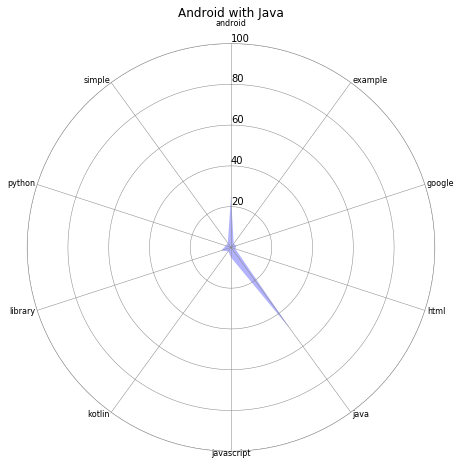

('Developer type : ', 'Ruby on Rails')


,Skill,Weight
7,ruby,54.831234
4,javascript,12.298299
6,rails,10.051735
9,simple,4.445900
8,shell,3.718629
1,files,3.455893
5,library,3.308338
3,html,2.701385
0,css,2.679166
2,framework,2.509421


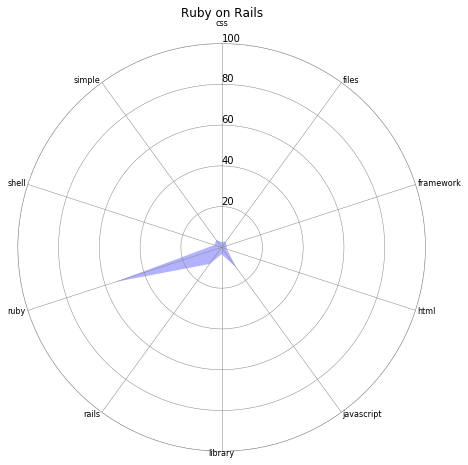

('Developer type : ', 'Static HTML Designer')


,Skill,Weight
2,css,42.014246
4,html,39.849639
5,javascript,6.074162
8,theme,2.697186
9,website,2.248194
7,simple,1.801420
6,ruby,1.739172
1,build,1.315539
3,google,1.151988
0,angular,1.108455


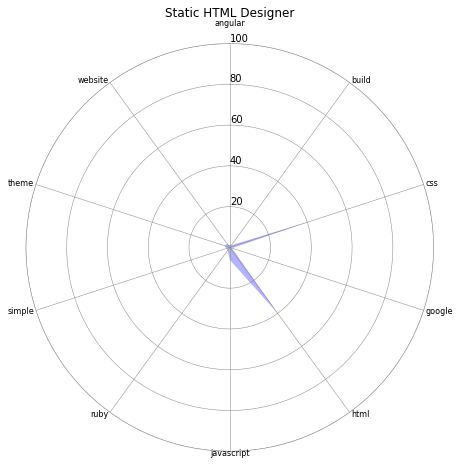

('Developer type : ', 'PHP Developer')


,Skill,Weight
6,php,52.438605
3,javascript,14.344286
4,laravel,5.073958
8,simple,4.962217
9,wordpress,4.633325
1,framework,4.061662
0,css,4.042148
5,library,3.756090
7,shell,3.636743
2,html,3.050967


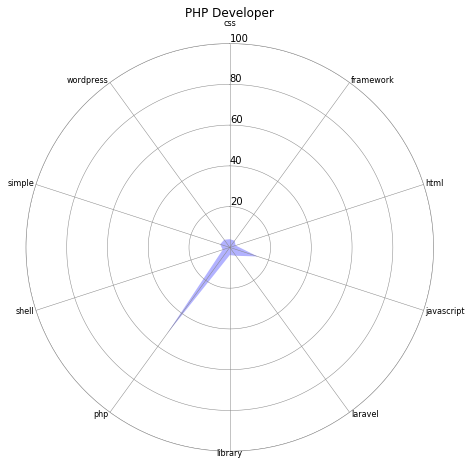

In [10]:
from math import pi
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML




def show_graph(cat, values, title):
    N = len(cat)
    x_as = [n / float(N) * 2 * pi for n in range(N)]

    # Because our chart will be circular we need to append a copy of the first 
    # value of each list at the end of each list with data
    values += values[:1]
    x_as += x_as[:1]

    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")

    # Create polar plot
    plt.figure(figsize=(15,7.5))
    ax = plt.subplot(111, polar=True)

    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Set position of y-labels
    ax.set_rlabel_position(0)

    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)

    # Set number of radial axes and remove labels
    plt.xticks(x_as[:-1], [])

    # Set yticks
    #plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])

    # Plot data
    ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)

    # Fill area
    ax.fill(x_as, values, 'b', alpha=0.3)

    # Set axes limits
    plt.ylim(0,100)
    plt.title(title)

    # Draw ytick labels to make sure they fit properly
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi

        if angle_rad == 0:
            ha, distance_ax = "center", 10
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 1
        elif angle_rad == pi:
            ha, distance_ax = "center", 1
        else:
            ha, distance_ax = "right", 1
        ax.text(angle_rad, 100 + distance_ax, cat[i], size=8, horizontalalignment=ha, verticalalignment="center")

    # Show polar plot
    plt.show()
    
def Get_Description(cat) :
    # Return developer description for a given skill set
    DEVELOPER_TYPES = [
        "Apple Developer",
        "Android with Java",
        "Multi language Jedi Developer",
        "Python with django ", 
        "React Angular" , 
        "PHP Developer",
        "Ruby on Rails", 
        "Static HTML Designer" ,
        "Unkown"]
    type_index = 8 # Default value
    if "c++"      in cat : type_index = 2
    if "android"  in cat : type_index = 1
    if "django"   in cat : type_index = 3
    if "react"    in cat : type_index = 4
    if "rails"    in cat : type_index = 6
    if "website"  in cat : type_index = 7
    if "swift"    in cat : type_index = 0
    if "wordpress" in cat : type_index = 5
    return DEVELOPER_TYPES[type_index]


role_index = []    
j = 0
for index, row in roles.iterrows():
    cat = []
    values = []
    for column in roles.columns: 
        if  row[column] > 0 :
            cat.append(column)
            values.append( row[column] / np.sum(row) * 100  )
    developer_description = Get_Description(cat[:10])
    skills = pd.DataFrame()
    skills['Skill']  = cat[:10]
    skills['Weight'] = values[:10]
    print ("Developer type : " , developer_description)
    role_index.append(developer_description)
    display(skills.sort_values('Weight', ascending = False ))
                               
    show_graph(cat = cat[:10], values = values[:10], title = developer_description)
    j = j +1 

,android,angular,build,c,c++,cocoa,css,django,example,files,...,python,rails,react,ruby,shell,simple,swift,theme,website,wordpress
Apple Developer,0.000000,0.000000,0.000000,0.000000,0.000000,0.011363,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.016811,0.000000,0.018601,0.134139,0.000000,0.000000,0.000000
Multi language Jedi Developer,0.000000,0.000000,0.000000,0.017902,0.019434,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030875,0.000000,0.000000,0.018451,0.024437,0.000000,0.000000,0.000000,0.000000,0.000000
React Angular,0.000000,0.011144,0.000000,0.000000,0.000000,0.000000,0.019636,0.000000,0.000000,0.010980,...,0.010327,0.000000,0.021851,0.010428,0.000000,0.015928,0.000000,0.000000,0.000000,0.000000
Python with django,0.000000,0.000000,0.000000,0.012181,0.012718,0.000000,0.000000,0.025595,0.000000,0.013045,...,0.266326,0.000000,0.000000,0.000000,0.015753,0.015052,0.000000,0.000000,0.000000,0.000000
Android with Java,0.128974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011265,0.000000,...,0.013649,0.000000,0.000000,0.000000,0.000000,0.013533,0.000000,0.000000,0.000000,0.000000
Ruby on Rails,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011952,0.000000,0.000000,0.015417,...,0.000000,0.044842,0.000000,0.244608,0.016589,0.019834,0.000000,0.000000,0.000000,0.000000
Static HTML Designer,0.000000,0.008287,0.009835,0.000000,0.000000,0.000000,0.314092,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.013002,0.000000,0.013467,0.000000,0.020164,0.016807,0.000000
PHP Developer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017290,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.015556,0.021225,0.000000,0.000000,0.000000,0.019818


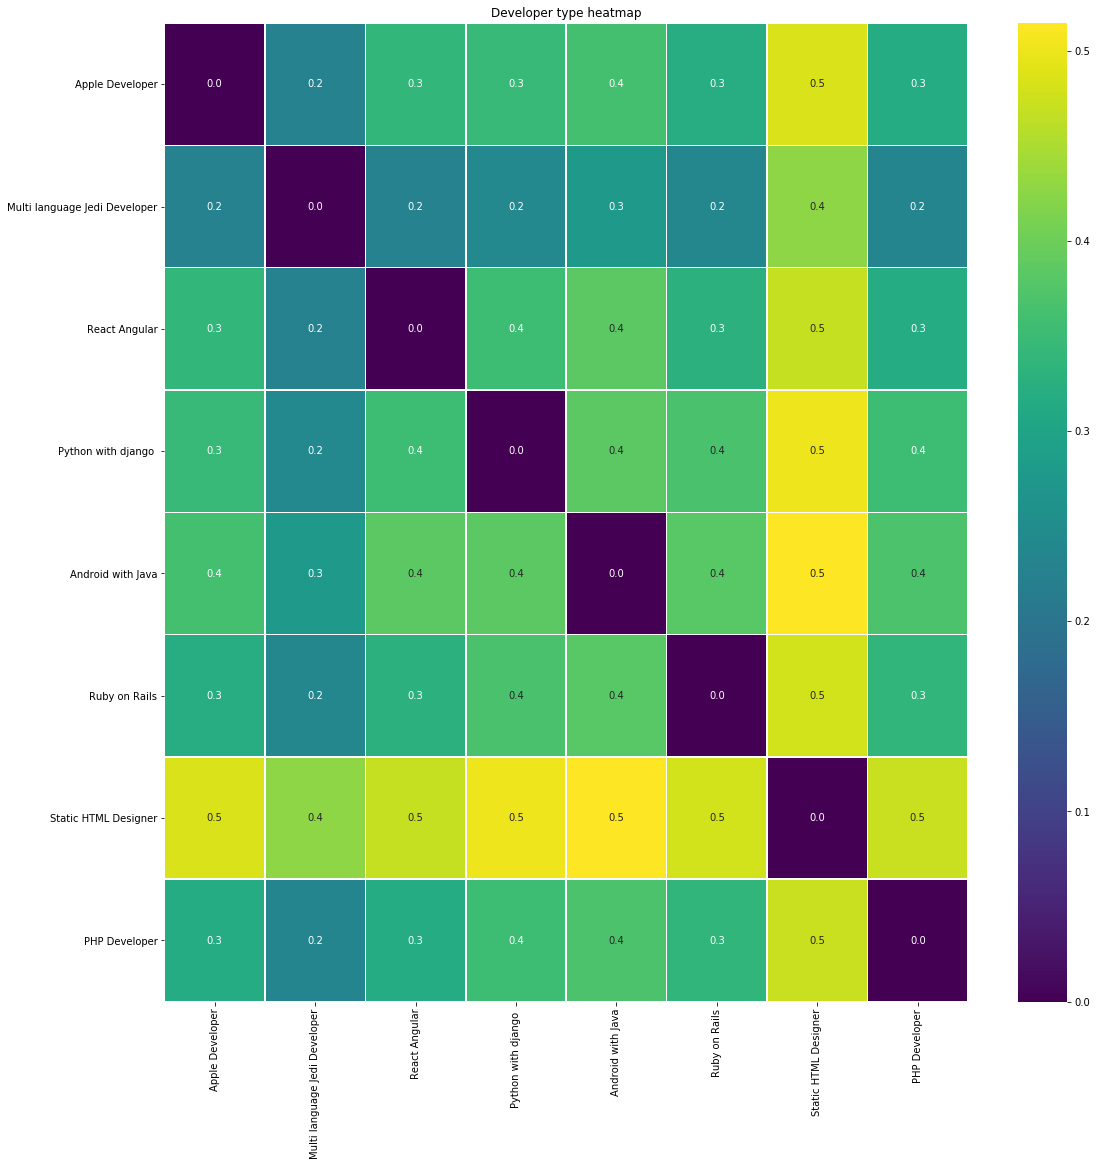

In [11]:
from scipy.spatial.distance import squareform, pdist
roles.index = role_index
display(roles)

res = pdist(roles, 'euclidean')
squareform(res)
roles_dist = pd.DataFrame(squareform(res), index=role_index, columns=role_index)
roles_dist

import seaborn as sns
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(18, 18))
plt.title("Developer type heatmap")
sns.heatmap(roles_dist , annot=True, linewidths=.5, fmt= '.1f',ax=ax , cmap='viridis' )